## Plotting the Poincare section and reactive islands

In [21]:
import numpy as np

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Helvetica']

# plt.style.use('seaborn-white') # use sans-serif fonts
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['figure.figsize'] = 5, 5

label_size = 25 #10, 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = 35 #, 15

mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0


# Import system-bath module
import saddlenode2dof
import importlib
importlib.reload(saddlenode2dof)
import saddlenode2dof as sn2dof


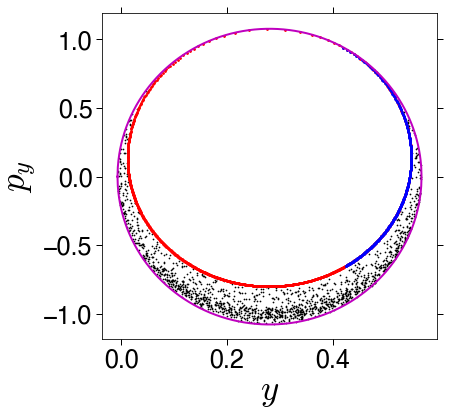

In [28]:

datapath_psect = './data-figures/poincare-sections/coupled_mu4_omega3_epsilon5_deltaEnergy5e-1/'
# datapath_psect = './data-figures/poincare-sections/uncoupled_mu4_omega3_epsilon0_deltaEnergy5e-1/'

# datapath_manifolds = './data-figures/manifolds/uncoupled_mu4_omega3_epsilon0_deltaEnergy5e-1/'
# datapath_manifolds = './data-figures/manifolds/uncoupled_alpha2_mu4_omega3_epsilon1e-20_deltaEnergy5e-1/'
datapath_manifolds = './data-figures/manifolds/coupled_mu4_omega3_epsilon5_deltaEnergy5e-1/'

# filename_psect = 'coupled_sn2dof_alpha5_tau20.txt'
# filename_psect = 'uncoupled_sn2dof_alpha2_tau20.txt'
filename_psect = 'coupled_sn2dof_alpha1_tau20.txt'
# filename_psect = 'uncoupled_sn2dof_alpha1_tau20.txt'

filename_smani = 'xeU1_stable_branch1_eqPt1_DelE0.5_saddlenode2dof.txt'
filename_umani = 'xeU1_unstable_branch1_eqPt1_DelE0.5_saddlenode2dof.txt'

intersections = np.loadtxt(datapath_psect + filename_psect)
smani_sos = np.loadtxt(datapath_manifolds + filename_smani) # first column is time, then x, y,px,py
umani_sos = np.loadtxt(datapath_manifolds + filename_umani) # first column is time, then x, y,px,py

# Model parameters
N = 2
MASS_A = 1.0
MASS_B = 1.0
MU = 4.00
ALPHA = 1.00
OMEGA = 3.00
EPSILON = 5.00

deltaEnergy = 0.5
saddleEnergy = 0
totalEnergy = saddleEnergy + deltaEnergy
params = [MASS_A, MASS_B, MU, ALPHA, OMEGA, EPSILON]

energy_boundary = sn2dof.energysurface_intersect_sos(params, deltaEnergy, 1.0)
index_pos_px = np.where(intersections[:,2] > 0)

plt.close('all')
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()

ax.plot(energy_boundary[:,0], energy_boundary[:,1], linewidth = 2, color = 'm')
# ax.scatter(initconds[:,1], initconds[:,3], s = 5)
ax.scatter(intersections[index_pos_px,1], intersections[index_pos_px,3], s = 0.5, c = 'k')

ax.scatter(umani_sos[:,2], umani_sos[:,4], s = 3, c = 'r')
ax.scatter(smani_sos[:,2], smani_sos[:,4], s = 3, c = 'b')
# ax.fill_between(smani_sos[:,2], smani_sos[:,4], \
#                 color = 'blue', alpha = 0.5)

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$p_y$')
plt.tick_params(axis = 'both', which = 'major')
# plt.savefig('coupled_alpha5_mu4_omega3_epsilon5_deltaEnergy5e-1.pdf', \
#            bbox_inches = 'tight')
plt.savefig('coupled_alpha1_mu4_omega3_epsilon5_deltaEnergy5e-1.png', \
            dpi = 600, bbox_inches = 'tight')
# plt.savefig('uncoupled_alpha1_mu4_omega3_epsilon0_deltaEnergy5e-1.png', \
#             dpi = 600, bbox_inches = 'tight')
plt.show()


In [73]:
np.shape(umani_sos)

(1000, 5)

## Making the grid of Poincare surface of section plots